In [1]:
from preprocess.arpit_v2 import *
from preprocess.preprocess_v2 import *
from preprocess.preprocess_v2 import preprocess
import os
import inspect
import time
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
from models.LDA_multi_level import lda_model_multi_level
from models.LDA_single_level import lda_model_single_level
from models.lda_mallet import lda_mallet
%matplotlib inline
from newsplease import NewsPlease
print('------------------------------------------------------')
print('- Imports Done')

------------------------------------------------------
- Imports Done


## LDA on all Text - month-wise

### Extracting text

In [51]:
folder = 'data/texts/12'

In [52]:
dict_12 = {}
for files in os.listdir(folder):
    if '.DS_Store' in files:
        continue
    else:
        news_article = pickle.load(open(os.path.join(folder, files), 'rb'))
        text = news_article.text
        dict_12[files.split('.pkl')[0]] = text

In [53]:
print('Number of articles in 1' ,len(dict_01))
print('Number of articles in 2' ,len(dict_02))
print('Number of articles in 3' ,len(dict_03))
print('Number of articles in 4' ,len(dict_04))
print('Number of articles in 5' ,len(dict_05))
print('Number of articles in 6' ,len(dict_06))
print('Number of articles in 7' ,len(dict_07))
print('Number of articles in 8' ,len(dict_08))
print('Number of articles in 9' ,len(dict_09))
print('Number of articles in 10' ,len(dict_10))
print('Number of articles in 11' ,len(dict_11))
print('Number of articles in 12' ,len(dict_12))

Number of articles in 1 6627
Number of articles in 2 4262
Number of articles in 3 4314
Number of articles in 4 7166
Number of articles in 5 2265
Number of articles in 6 5917
Number of articles in 7 6389
Number of articles in 8 6368
Number of articles in 9 5767
Number of articles in 10 5898
Number of articles in 11 5505
Number of articles in 12 4892


In [54]:
a = len(dict_01) +len(dict_02) +len(dict_03) +len(dict_04) +len(dict_05) +len(dict_06) +len(dict_07) +len(dict_08) +len(dict_09) +len(dict_10) +len(dict_11) +len(dict_12)
print('Total News Articles: ', a)

Total News Articles:  65370


## Month - 01 

In [69]:
raw_docs = []
for key,value in dict_01.items():
    raw_docs.append(value)

In [72]:
raw_docs = np.array(raw_docs)
len(raw_docs)

6627

In [73]:
print('Total documents - ', len(raw_docs))
type(raw_docs)

Total documents -  6627


numpy.ndarray

In [74]:
# DATA
# Note that raw docs is a numpy array. 
# Example element is: 
# 'Logical Disk Free Space is low, Description: The disk C: on computer sjcphxstg02.strykercorp.com is running out of disk space. The values that exceeded the thre'
# data_file_string = 'short_description.pkl'

# data_file_string = 'gold_standard.csv'
# data_file = os.path.join(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))),'data',data_file_string)
# raw_docs = pickle.load(open(data_file,'rb'))

print('- Imported Data')

- Imported Data


In [75]:
# PRE-PROCESSING
preprocess_steps_and_order = {
	'make_lowercase': [True],
	'punctuation_removal':[True],
	'whitespace_removal': [True],
	'store_alphanumeric': [False],
	'pos_removal_nltk': [True, {'pos_removal_nltk_list':['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  'PRP','PRP$',  'RB','RBR','RBS','RP',  'JJ','JJR','JJS',   'CC','DT','EX','IN',   'WDT','WP','WP$','WRB']}],
	'tokenization_nltk': [False],
	'lemmatization_tokenization_spacy': [True],
	'stopwords_removal_nltk': [True],
	'stopwords_removal_spacy': [False],
	'make_bigrams_gensim':[True, {'make_bigrams_gensim': True, 'bigrams_min_count': 10, 'bigrams_threshold': 10}],
	'make_trigrams_gensim':[True, {'make_trigrams_gensim': True, 'trigrams_min_count': 10, 'trigrams_threshold': 10}],
	'min_max_length_removal':[False, {'min_max_length_removal': False, 'mmlr_min_len': 3, 'mmlr_max_len': 50, 'mmlr_deacc': False}]
	}

preprocess_functions = {
	'make_lowercase': make_lowercase,
	'punctuation_removal': punctuation_removal,
	'whitespace_removal': whitespace_removal,
	'store_alphanumeric': store_alphanumeric,
	'pos_removal_nltk': pos_removal_nltk,
	'tokenization_nltk': tokenization_nltk,
	'lemmatization_tokenization_spacy': lemmatization_tokenization_spacy,
	'stopwords_removal_nltk': stopwords_removal_nltk,
	'stopwords_removal_spacy': stopwords_removal_spacy,
	'make_bigrams_gensim': make_bigrams_gensim,
	'make_trigrams_gensim': make_trigrams_gensim,
	'min_max_length_removal': min_max_length_removal
	}

In [76]:
# MODELS
models_dict = {
	'LDA_single_level': lda_model_single_level,
	'LDA_multi_level': lda_model_multi_level,
}

In [77]:
# SPECIFICATIONS

num_topics_list_level_1 = np.arange(1,51,1).tolist()
# num_topics_list_level_1 = [6]

specifications = {
	# 'model':'LDA_single_level', # Can be LDA_multi_level
	'level':2,
	'num_topics_list_level_1':num_topics_list_level_1,
	'num_topics_list_level_2':[3,5,8,11],
	'num_topics_list_level_3':[1,2,3,4,5],
	'coherence':'c_v',
	'need_best_topic': True,
	'model_selection_metric':'coherence', # or 'perplexity',
	'debug':False,
    'sample_to_print':1,
#     'pos_removal_spacy_list':['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE'],
}

In [78]:
print('*****************************************************')
print('- Starting preprocessing')
dictionary, corpus, doc_list = preprocess(
								raw_docs = raw_docs, 
								preprocess_functions = preprocess_functions, 
								preprocess_steps_and_order = preprocess_steps_and_order, 
								debug=specifications['debug'])

*****************************************************
- Starting preprocessing

       ##### Lowercasing Done! Time Taken -  0.06921911239624023

       ##### Punctuation removed! Time Taken -  0.6453289985656738

       ##### Whitespace removed! Time Taken -  0.23857402801513672

       ##### POS Removal Done! Time Taken -  84.24763607978821

       ##### Lemmatization and Tokenization Done using Spacy! Time Taken -  141.69726014137268

       ##### Stopwords Removed using NLTK! Time Taken -  0.7578511238098145

       ##### Bi-Grams made using Gensim! Time Taken -  3.987764358520508

       ##### Tri-Grams made using Gensim! Time Taken -  3.8081212043762207
~~~ pre-processing done in  235.52698588371277
 
- Creating dictionary and corpus


### LDA Single Level

In [79]:
print('*****************************************************')
print('- Starting model training')
lda_dict = lda_model_single_level(
					dictionary = dictionary,
					corpus = corpus,
					doc_list = doc_list,
					num_topics_list_level_1 = specifications['num_topics_list_level_1'], 
					coherence = specifications['coherence'],
					debug = specifications['debug'],
					need_best_topic = specifications['need_best_topic'],
					model_selection_metric = specifications['model_selection_metric']
					)

*****************************************************
- Starting model training
 
Sample data point:  []
 
	### Running LDA for number of topic - 1
	LDA Done for 1 topic! Time Taken is 9.025940895080566
	Evaluating model for number of topic - 1
Coherence - 0.2001581048496064, Perplexity - -8.88430069225882
---
	### Running LDA for number of topic - 2
	LDA Done for 2 topic! Time Taken is 23.623414039611816
	Evaluating model for number of topic - 2
Coherence - 0.3920533530634164, Perplexity - -8.740767237388974
---
	### Running LDA for number of topic - 3
	LDA Done for 3 topic! Time Taken is 26.65942096710205
	Evaluating model for number of topic - 3
Coherence - 0.44799952240077956, Perplexity - -8.695904108082615
---
	### Running LDA for number of topic - 4
	LDA Done for 4 topic! Time Taken is 29.146817684173584
	Evaluating model for number of topic - 4
Coherence - 0.5276101142598286, Perplexity - -8.681156824226955
---
	### Running LDA for number of topic - 5
	LDA Done for 5 topic! Tim

Coherence - 0.4209394002634546, Perplexity - -22.268356848746876
---
	### Running LDA for number of topic - 40
	LDA Done for 40 topic! Time Taken is 109.74571681022644
	Evaluating model for number of topic - 40
Coherence - 0.3988009479376923, Perplexity - -22.63048298786844
---
	### Running LDA for number of topic - 41
	LDA Done for 41 topic! Time Taken is 116.65498995780945
	Evaluating model for number of topic - 41
Coherence - 0.405125547222922, Perplexity - -22.981859921873962
---
	### Running LDA for number of topic - 42
	LDA Done for 42 topic! Time Taken is 118.4393880367279
	Evaluating model for number of topic - 42
Coherence - 0.41097881762351496, Perplexity - -23.331237629001453
---
	### Running LDA for number of topic - 43
	LDA Done for 43 topic! Time Taken is 121.7742509841919
	Evaluating model for number of topic - 43
Coherence - 0.41117860479568763, Perplexity - -23.681157154718136
---
	### Running LDA for number of topic - 44
	LDA Done for 44 topic! Time Taken is 125.87914

In [80]:
print('Best Topic',lda_dict['best_topic'])

Best Topic 4


<Figure size 864x864 with 0 Axes>

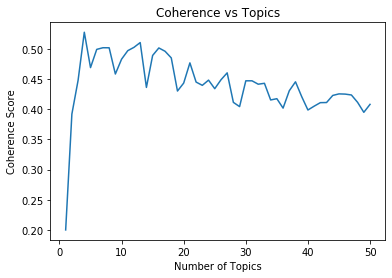

<Figure size 864x864 with 0 Axes>

In [81]:
plt.plot(num_topics_list_level_1, lda_dict['coherence_score_list'])
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence vs Topics')
plt.figure(figsize=(12,12))

In [82]:
lda_dict['coherence_score_list']

array([0.2001581 , 0.39205335, 0.44799952, 0.52761011, 0.46903846,
       0.49922853, 0.50194249, 0.50186601, 0.4584082 , 0.48298853,
       0.49710247, 0.50261597, 0.51052174, 0.43620499, 0.48915175,
       0.50159099, 0.49610748, 0.48511335, 0.43023191, 0.4433962 ,
       0.47687765, 0.44505588, 0.43964721, 0.44828795, 0.43411762,
       0.44880493, 0.46033355, 0.41142592, 0.40442379, 0.4471569 ,
       0.44716011, 0.44153825, 0.44302738, 0.41544089, 0.41752957,
       0.4019309 , 0.43068721, 0.44552293, 0.4209394 , 0.39880095,
       0.40512555, 0.41097882, 0.4111786 , 0.42293058, 0.42549181,
       0.42513208, 0.42369761, 0.41146926, 0.39495864, 0.40814242])

<Figure size 864x864 with 0 Axes>

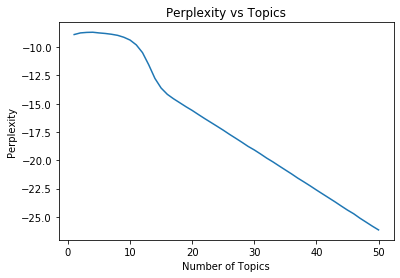

<Figure size 864x864 with 0 Axes>

In [83]:
plt.plot(num_topics_list_level_1, lda_dict['perplexity_score_list'])
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Topics')
plt.figure(figsize=(12,12))

In [84]:
pyLDAvis.enable_notebook()
topic_to_show = 4
visualization = pyLDAvis.gensim.prepare(lda_dict['all_models'][topic_to_show], lda_dict['corpus'], lda_dict['dictionary'])
# pyLDAvis.save_html(visualization, 'lda_10.html')
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.254129 -0.031275       1        1  36.419708
0     -0.056140  0.127601       2        1  24.369408
3      0.116647 -0.232105       3        1  24.045553
1      0.193622  0.135779       4        1  15.165331, topic_info=     Category         Freq       Term        Total  loglift  logprob
672   Default  1427.000000       film  1427.000000  30.0000  30.0000
424   Default  2586.000000      court  2586.000000  29.0000  29.0000
67    Default  2729.000000     farmer  2729.000000  28.0000  28.0000
981   Default  1234.000000   violence  1234.000000  27.0000  27.0000
917   Default  1178.000000  protester  1178.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
1163   Topic4   266.684387    railway   429.000061   1.4108  -5.9039
469    Topic4   318.457397        man  1502.271973   0.3349  -5.7265
387    Topic4   304.003662    service  1134.166748   0.5695  -5.7730
509    Topic4   290.135681   security  1000.235291   0.6485  -5.8196
323    Topic4   284.135223    vehicle   944.763916   0.6847  -5.8405

[267 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1130      2  0.972790       aap
1130      4  0.026381       aap
302       3  0.998517  accident
402       2  0.408036  activist
402       4  0.589781  activist
...     ...       ...       ...
324       4  0.125234     woman
857       1  0.527844      work
857       2  0.124521      work
857       3  0.337539      work
857       4  0.010181      work

[424 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [94]:
pyLDAvis.enable_notebook()
topic_to_show = 13
visualization = pyLDAvis.gensim.prepare(lda_dict['all_models'][topic_to_show], lda_dict['corpus'], lda_dict['dictionary'])
# pyLDAvis.save_html(visualization, 'lda_10.html')
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.073528 -0.202682       1        1  17.514740
0      0.254694 -0.018372       2        1  14.577500
6      0.250051 -0.033988       3        1  11.212085
11    -0.100060 -0.187167       4        1   8.840359
3      0.013176 -0.197124       5        1   8.507142
2      0.192103  0.197885       6        1   6.514297
7     -0.151312  0.017452       7        1   5.901505
10    -0.114894 -0.026454       8        1   5.435422
1     -0.141562  0.043683       9        1   5.386238
5     -0.131786  0.002618      10        1   4.977863
9     -0.084976  0.114777      11        1   4.842248
4     -0.012980  0.094718      12        1   4.481495
8     -0.045984  0.194653      13        1   1.809106, topic_info=     Category         Freq       Term        Total  loglift  logprob
300   Default  2867.000000    village  2867.000000  30.0000  30.0000
67    Default  3165.000000     farmer  3165.000000  29.0000  29.0000
33    Default  2091.000000      party  2091.000000  28.0000  28.0000
595   Default  2053.000000        bjp  2053.000000  27.0000  27.0000
184   Default  2342.000000       fire  2342.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
1106  Topic13    70.159218      fraud    71.347542   3.9955  -5.1130
297   Topic13   156.109451     update   219.766678   3.6703  -4.3133
722   Topic13   273.820221    company  2175.976562   1.9396  -3.7513
938   Topic13    94.191467    content   182.864166   3.3489  -4.8185
3384  Topic13    86.914261  executive   259.078522   2.9201  -4.8989

[642 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1960      5  0.997771  "_-PRON-
1352      1  0.815696         '
1352      2  0.183506         '
1920     11  0.988375   aadhaar
1130      1  0.996646       aap
...     ...       ...       ...
984       2  0.063063  “_-PRON-
984       3  0.069931  “_-PRON-
984       5  0.299081  “_-PRON-
984       7  0.058692  “_-PRON-
984      10  0.046205  “_-PRON-

[1006 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 1, 7, 12, 4, 3, 8, 11, 2, 6, 10, 5, 9])

In [85]:
def get_topics(lda_model):
	topics = lda_model.print_topics()
	print("~~~ Topics are:")
	for i in range(len(topics)):
		print('Topic ',i)
		print(topics[i][1])
		print(' ')

In [86]:
get_topics(lda_dict['all_models'][topic_to_show])

~~~ Topics are:
Topic  0
0.013*"court" + 0.010*"party" + 0.010*"bjp" + 0.007*"congress" + 0.005*"member" + 0.005*"medium" + 0.005*"election" + 0.005*"president" + 0.004*"karnataka" + 0.004*"meeting"
 
Topic  1
0.015*"film" + 0.013*"violence" + 0.012*"protester" + 0.010*"mumbai" + 0.009*"bus" + 0.008*"dalit" + 0.006*"road" + 0.006*"gujarat" + 0.006*"movie" + 0.005*"maharashtra"
 
Topic  2
0.011*"farmer" + 0.008*"project" + 0.008*"water" + 0.007*"company" + 0.005*"airport" + 0.005*"development" + 0.005*"market" + 0.005*"land" + 0.005*"business" + 0.004*"price"
 
Topic  3
0.012*"fire" + 0.010*"village" + 0.007*"body" + 0.007*"pakistan" + 0.007*"man" + 0.006*"family" + 0.006*"army" + 0.006*"hospital" + 0.006*"road" + 0.006*"border"
 


In [95]:
get_topics(lda_dict['all_models'][topic_to_show])

~~~ Topics are:
Topic  0
0.013*"development" + 0.012*"job" + 0.011*"school" + 0.011*"system" + 0.010*"modi" + 0.008*"policy" + 0.008*"service" + 0.008*"student" + 0.008*"programme" + 0.008*"university"
 
Topic  1
0.037*"violence" + 0.030*"dalit" + 0.023*"karnataka" + 0.021*"maharashtra" + 0.019*"justice" + 0.018*"youth" + 0.018*"bandh" + 0.016*"event" + 0.013*"hindu" + 0.012*"union_minister"
 
Topic  2
0.041*"market" + 0.038*"company" + 0.031*"business" + 0.026*"industry" + 0.026*"price" + 0.026*"china" + 0.020*"sector" + 0.020*"growth" + 0.019*"product" + 0.016*"economy"
 
Topic  3
0.052*"village" + 0.025*"girl" + 0.022*"singh" + 0.019*"officer" + 0.018*"house" + 0.018*"resident" + 0.016*"team" + 0.012*"villager" + 0.009*"owner" + 0.009*"“_-PRON-"
 
Topic  4
0.072*"party" + 0.071*"bjp" + 0.046*"congress" + 0.033*"election" + 0.018*"opposition" + 0.014*"power" + 0.013*"pakoda" + 0.012*"politic" + 0.012*"poll" + 0.011*"location"
 
Topic  5
0.055*"film" + 0.021*"movie" + 0.019*"protester

### LDA Multi-Level

In [20]:
# print('*****************************************************')
# print('- Starting model training')
# lda_level_1, lda_level_2 = lda_model_multi_level(
# 					level = specifications['level'],
# 					dictionary = dictionary,
# 					corpus = corpus,
# 					doc_list = doc_list,
# 					coherence = specifications['coherence'],
# 					debug = specifications['debug'],
# 					need_best_topic = specifications['need_best_topic'],
# 					model_selection_metric = specifications['model_selection_metric'],
# 					num_topics_list_level_1 = specifications['num_topics_list_level_1'], 
# 					num_topics_list_level_2 = specifications['num_topics_list_level_2'], 
# 					)

### Mallet LDA

In [21]:
# print('*****************************************************')
# print('- Starting model training')
# lda_dict = lda_mallet(
# 					dictionary = dictionary,
# 					corpus = corpus,
# 					doc_list = doc_list,
# 					num_topics_list_level_1 = specifications['num_topics_list_level_1'], 
# 					coherence = specifications['coherence'],
# 					debug = specifications['debug'],
# 					need_best_topic = specifications['need_best_topic'],
# 					model_selection_metric = specifications['model_selection_metric']
# 					)

## Visualization

In [91]:
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

### What is the Dominant topic and its percentage contribution in each document

In [ ]:
# In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. 
# The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a 
# nicely formatted output.
# This way, you will know which document belongs predominantly to which topic.

In [96]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=doc_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [97]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_dict['all_models'][topic_to_show], corpus=corpus, texts=doc_list)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,12.0,0.1946,"court, member, medium, president, matter, meeting, decision, december, order, —",[]
1,1,4.0,0.8351,"party, bjp, congress, election, opposition, power, pakoda, politic, poll, location","[gorakhpur, rahul_gandhi, visit, state, congress_president, minister_yogi_adityanath, today, politic, development, congress_leader, state, day_visit, party_worker, lok_sabha_poll, life, party, performance, assembly_election, seat, member, house, ..."
2,2,0.0,0.2930,"development, job, school, system, modi, policy, service, student, programme, university","[story, narendra_patil, grey, medium, cabinet_minister, son, year, farmer, dhule, poison, mantralaya, week, sunday, body, state, run, jj_hospital, narendra, son, protest, hospital, morning, demand, government, assurance, status, compensation_land..."
3,3,3.0,0.1923,"village, girl, singh, officer, house, resident, team, villager, owner, “_-PRON-","[merubhai, farmer, dholka, ahmedabad, trip, year, bharwad, traveller, —, friend, family, location, asia, claim, trip, year, plan, advance, cash, flow, management, trip, bharwad, graduate, commerce, prefer, group, tour, lone, —, farmer]"
4,4,0.0,0.4896,"development, job, school, system, modi, policy, service, student, programme, university","[farmer, country, support_price_msp, crop, effort, remuneration, agriculture, minister, radhamohan, singh, today, question_hour, rajya_sabha, singh, experience, farmer, price_msp, experience, area, delhi, area, msp, paddy, farmer, process, procur..."
5,5,0.0,0.5769,"development, job, school, system, modi, policy, service, student, programme, university","[delhi, minister_narendra_modi, day, counterpart_benjamin_netanyahu, delhi, day_visit, modi, minister, netanyahu, airport, hug, arrival, visit, leader, dialogue, variety, issue, solemn, ceremony, murti, memorial, delhi, noon, rename, murti_chowk_..."
6,6,12.0,0.1946,"court, member, medium, president, matter, meeting, decision, december, order, —",[]
7,7,10.0,0.5356,"pakistan, army, border, force, kashmir, militant, soldier, troop, jammu, civilian","[army, monday, action, troop, soldier, control_loc, jammu_poonch, district, action, soldier, pakistani_firing, loc_jammu, rajouri_district, army_retaliation, troop, area, loc_mendhar_sector, district, army, officer, pti, action, casualty, troop, ..."
8,8,6.0,0.5429,"farmer, project, water, land, crore, farm, road, department, bird, crop","[tourism, awareness, farm, animal, authority, lion, tourist, attraction, gujarat, cow, draw, traveller, state, gujarat, state, gauseva, ayog, livestock, cow, tourism, project, farm, animal, people, cow, rear, product, urine, dung, day, trip, cow_..."
9,9,11.0,0.5338,"mumbai, road, airport, bus, vehicle, protester, car, student, passenger, traffic","[bhimavaram, road_accident, town, district, woman, injury, vehicle, gorge, incident, yanamadurru, lock, liza, region, woman, injury, government, hospital, bhimavaram, body_postmortem, case, driving, driver, investigation, police, woman, employee,..."


In [29]:
# df_dominant_topic['Text'][0] is equal to doc_list[0]

### The most representative sentence for each topic

In [90]:
# Sometimes you want to get samples of sentences that most represent a given topic. 
# This code gets the most exemplar sentence for each topic.

In [89]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 250

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9973,"court, party, bjp, congress, member, medium, election, president, karnataka, meeting","[ist, turn, bharatiya_janata_party, unit, tuesday, declaration, monday, party, state, upcome_assembly_poll, suspension, state, party_leader, move, bjp, state, unit, part, declaration, leadership, union_minister, damage, control, mode, election_pr..."
1,1.0,0.9990,"film, violence, protester, mumbai, bus, dalit, road, gujarat, movie, maharashtra","[news, aug_aug_aug_aug, aug_aug_aug_aug, aug_aug_aug_aug, aug_aug_aug_aug, jul_jul_jul_jul, jul_jul_jul_jul, jul_jul_jul_jul, jul_jul_jul_jul, jul_jul_jul_jul, jul, jun_jun_jun_jun, jun_jun_jun_jun, jun_jun_jun_jun, jun_jun_jun_jun, jun_jun, jun,..."
2,2.0,0.9977,"farmer, project, water, company, airport, development, market, land, business, price","[cabinet_committee, affair_minister, shri, narendra_modi, approval, implementation, jal, marg, vikas, project, jmvp, capacity, augmentation, navigation, waterway, cost_rs_crore, assistance, investment_support, bank, project, march, impact, mode_t..."
3,3.0,0.9950,"fire, village, body, pakistan, man, family, army, hospital, road, border","[jammu, tawi, jan, civilian_bsf, man, india, pakistan, fire, area, control, jammu_kashmir, morning, official, civilian_bsf, army, shell_fire, arina, rs_pura, sector_jammu, “, woman, arina, sector, youth, rs_pura_sector, "", civilian, jeet, raj, ra..."


In [98]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 250

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.7243,"development, job, school, system, modi, policy, service, student, programme, university","[delhi, pearson, –, ’s, company, association, profit, online, platform, harvard, mit, partnership, access, array, age, program, today, ’s, population, skill, future, intelligence, robotic, institution, columbia, university, university, pennsylvan..."
1,1.0,0.5244,"violence, dalit, karnataka, maharashtra, justice, youth, bandh, event, hindu, union_minister","[administration, maharashtra, development, wake_protest, clash_dalit, maratha_group, clash, december, people, dalit_community, anniversary, koregaon_battle, part_maharashtra, mumbai_pune, violence, clash_dalit, maratha_group, transport_service, s..."
2,2.0,0.7038,"market, company, business, industry, price, china, sector, growth, product, economy","[bakery, market_research_report, key_player, …, market, demand, bakery_product, food, beverage, industry, cookie, pastry, demand, enzyme, level, enzyme, ingredient, bakery_product, scenario, enzyme, enzyme, material, product, enzyme, additive]"
3,3.0,0.7785,"village, girl, singh, officer, house, resident, team, villager, owner, “_-PRON-","[singapore_airline, cabin, crew, india, gold, steward, custom, officer, monday, jan, indira_airport, delhi, sia, spokesman, news, strait, confirm, member, cabin, crew, sia, flight, sq402, jan, delhi, custom, authority, operation, authority, detai..."
4,4.0,0.8397,"party, bjp, congress, election, opposition, power, pakoda, politic, poll, location","[rahul_gandhi, politic, development, rahul_gandhi, visit, state, congress_president, minister_yogi_adityanath, monday, politic, development, congress_leader, state, day_visit, party_worker, lok_sabha_poll, life, party, performance, assembly_elect..."
5,5.0,0.7396,"film, movie, protester, gujarat, rajasthan, padmaavat, release, highway, sena, karni_sena","[padmaavat, chittor, fort, century, history, fort, karni_sena, night, woman, jauhar, immolation, chittor, fort, distributor, padmaavat, rajasthan, tomorrow, court_order, distributor, film, story, rajput, padmini, protest, chittor, set, legend, ch..."
6,6.0,0.7220,"farmer, project, water, land, crore, farm, road, department, bird, crop","[jan_pti, union_minister_nitin_gadkari, government, petrol_diesel, gas, production, biomass, cultivation, income, bamboo, category, grass, department, permission, purpose, ethanol, cultivation, region, order, stability, farmer, transport_minister..."
7,7.0,0.6233,"family, woman, man, body, hospital, death, victim, murder, child, son","[police, case, ward_boy, relative, maru, allege, ward_boy, cylinder, mri_room, night, year, man, rajesh, maru, incident, resonance, machine, maru, room, oxygen_cylinder, hospital, mumbai, mumbai, police, case, ward_boy, relative, maru, allege, wa..."
8,8.0,0.7916,"firm, ban, company, news_agency, legislator, missile, iran, mine, coal, russia","[price_waterhouse, today, security, sit, order, audit, network_entity, multi_crore, satyam_scam, audit, satyam, fraud, market, week, price_waterhouse, network_entity, audit_certificate, company, india, year, price_waterhouse, tribunal, order, ord..."
9,9.0,0.6478,"fire, visit, letter, relation, phone, israel, photo, notice, pm, card","[affair_minister_swaraj, friday, indonesia, engagement, thailand, ministry_affair_spokesperson_kumar, twitter, eam, sushmaswaraj, emplane, jakarta, engagement, thailand, acteastpolicy, day, affair_minister, 5th, meeting, india, indonesia_commissi..."


### Frequency Distribution of Word Counts in Documents

In [ ]:
# When working with a large number of documents, you want to know how big the documents are as a whole and 
# by topic. Let’s plot the document word counts distribution.

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 500), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,500,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

### Word Clouds of Top N Keywords in Each Topic

In [90]:
extra_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","ml","moreover","mostly","mr","mrs","much","must","n","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","omitted","one","ones","onto","ord","others","otherwise","overall","owing","p","particular","particularly","past","per","perhaps","placed","please","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","rather","rd","readily","really","recent","recently","regarding","regardless","regards","related","relatively","respectively","resulted","resulting","right","sec","seem","seemed","seeming","seems","seen","self","selves","seven","several","shall","shed","shes","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","us","use","useful","usefully","usefulness","uses","using","usually","v","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","world","wouldnt","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder", "time", "secs","dear","good", "afternoon", "hello", "regard", "solve", "successfull"]
#Added the following words to this list
#Removed the following words from this list: com, value, 
stop_words_nltk = stopwords.words('english')
#adding the extra words to nltk stopwords
stop_words_nltk.extend(extra_words)
stop_words_nltk.sort()

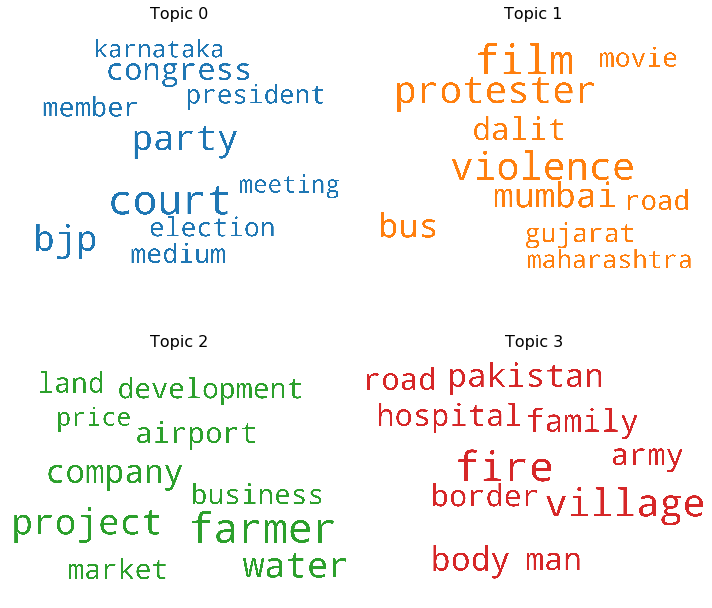

In [92]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words_nltk,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_dict['all_models'][topic_to_show].show_topics(formatted=False)

# Have to change this parameter
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [101]:
topics = lda_dict['all_models'][topic_to_show].show_topics(formatted=False,)

In [109]:
lda_dict['all_models'][topic_to_show].show_topics()

[(8,
  '0.039*"firm" + 0.026*"ban" + 0.023*"company" + 0.023*"news_agency" + 0.022*"legislator" + 0.021*"missile" + 0.019*"iran" + 0.015*"mine" + 0.015*"coal" + 0.013*"russia"'),
 (5,
  '0.055*"film" + 0.021*"movie" + 0.019*"protester" + 0.016*"gujarat" + 0.016*"rajasthan" + 0.015*"padmaavat" + 0.011*"release" + 0.010*"highway" + 0.010*"sena" + 0.010*"karni_sena"'),
 (2,
  '0.041*"market" + 0.038*"company" + 0.031*"business" + 0.026*"industry" + 0.026*"price" + 0.026*"china" + 0.020*"sector" + 0.020*"growth" + 0.019*"product" + 0.016*"economy"'),
 (4,
  '0.072*"party" + 0.071*"bjp" + 0.046*"congress" + 0.033*"election" + 0.018*"opposition" + 0.014*"power" + 0.013*"pakoda" + 0.012*"politic" + 0.012*"poll" + 0.011*"location"'),
 (10,
  '0.040*"pakistan" + 0.031*"army" + 0.030*"border" + 0.025*"force" + 0.023*"kashmir" + 0.018*"militant" + 0.017*"soldier" + 0.015*"troop" + 0.013*"jammu" + 0.013*"civilian"'),
 (6,
  '0.044*"farmer" + 0.032*"project" + 0.032*"water" + 0.028*"land" + 0.014*"

0
1
2
3
4
5
6
7
8
9
10


IndexError: list index out of range

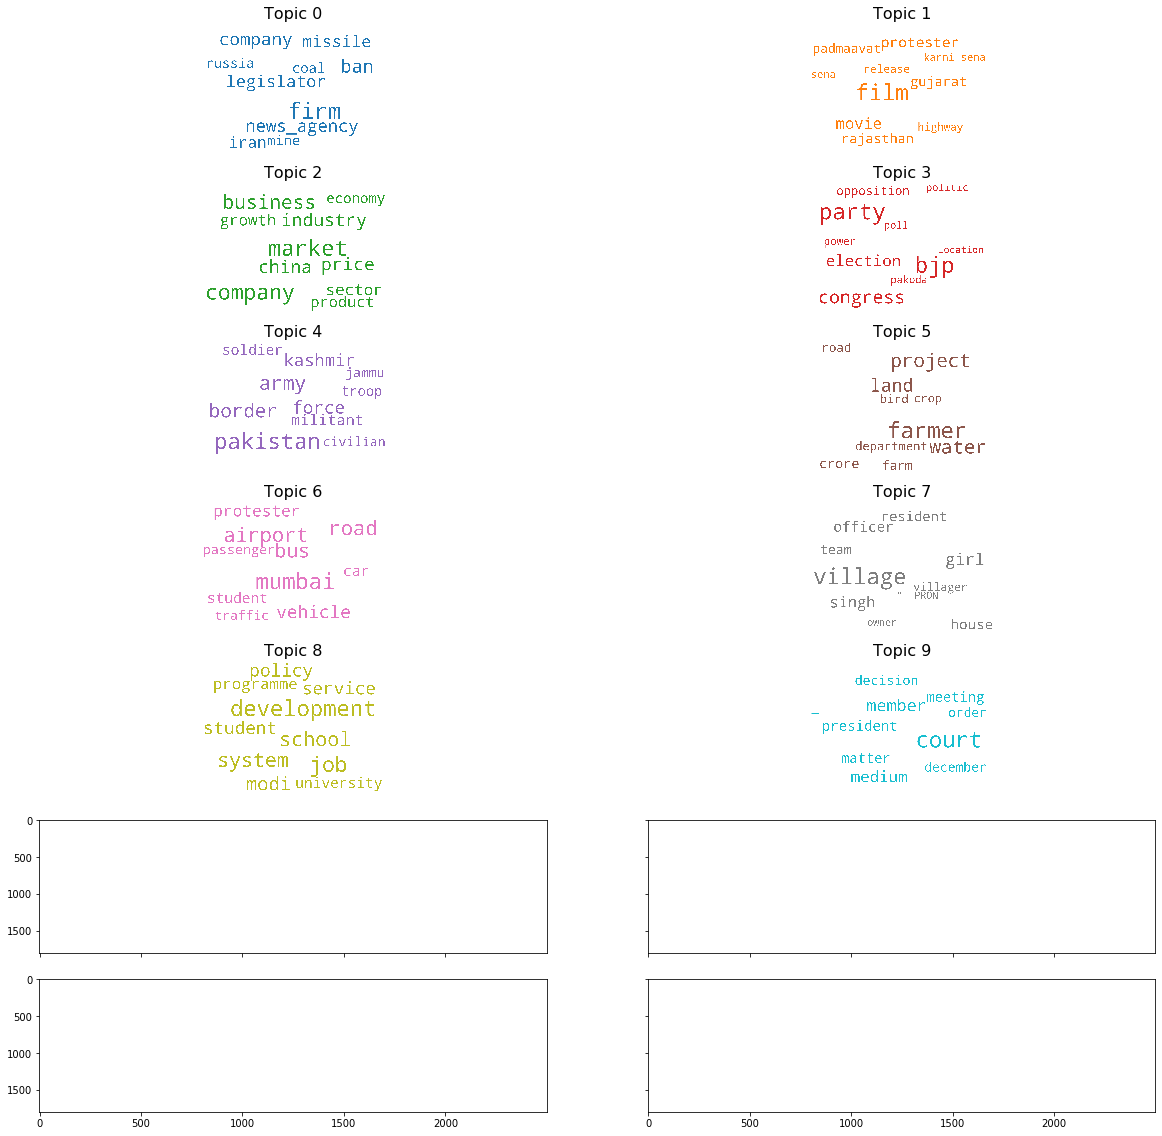

In [100]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words_nltk,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_dict['all_models'][topic_to_show].show_topics(formatted=False)

# Have to change this parameter
fig, axes = plt.subplots(7, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    print(i)
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords

In [ ]:
# When it comes to the keywords in the topics, the importance (weights) of 
# the keywords matters. Along with that, how frequently the words have appeared in the 
# documents is also interesting to look.

# Let’s plot the word counts and the weights of each keyword in the same chart.

# You want to keep an eye out on the words that occur in multiple topics and the 
# ones whose relative frequency is more than the weight. Often such words turn out to be 
# less important. The chart I’ve drawn below is a result of adding several such words to the 
# stop words list in the beginning and re-running the training process.

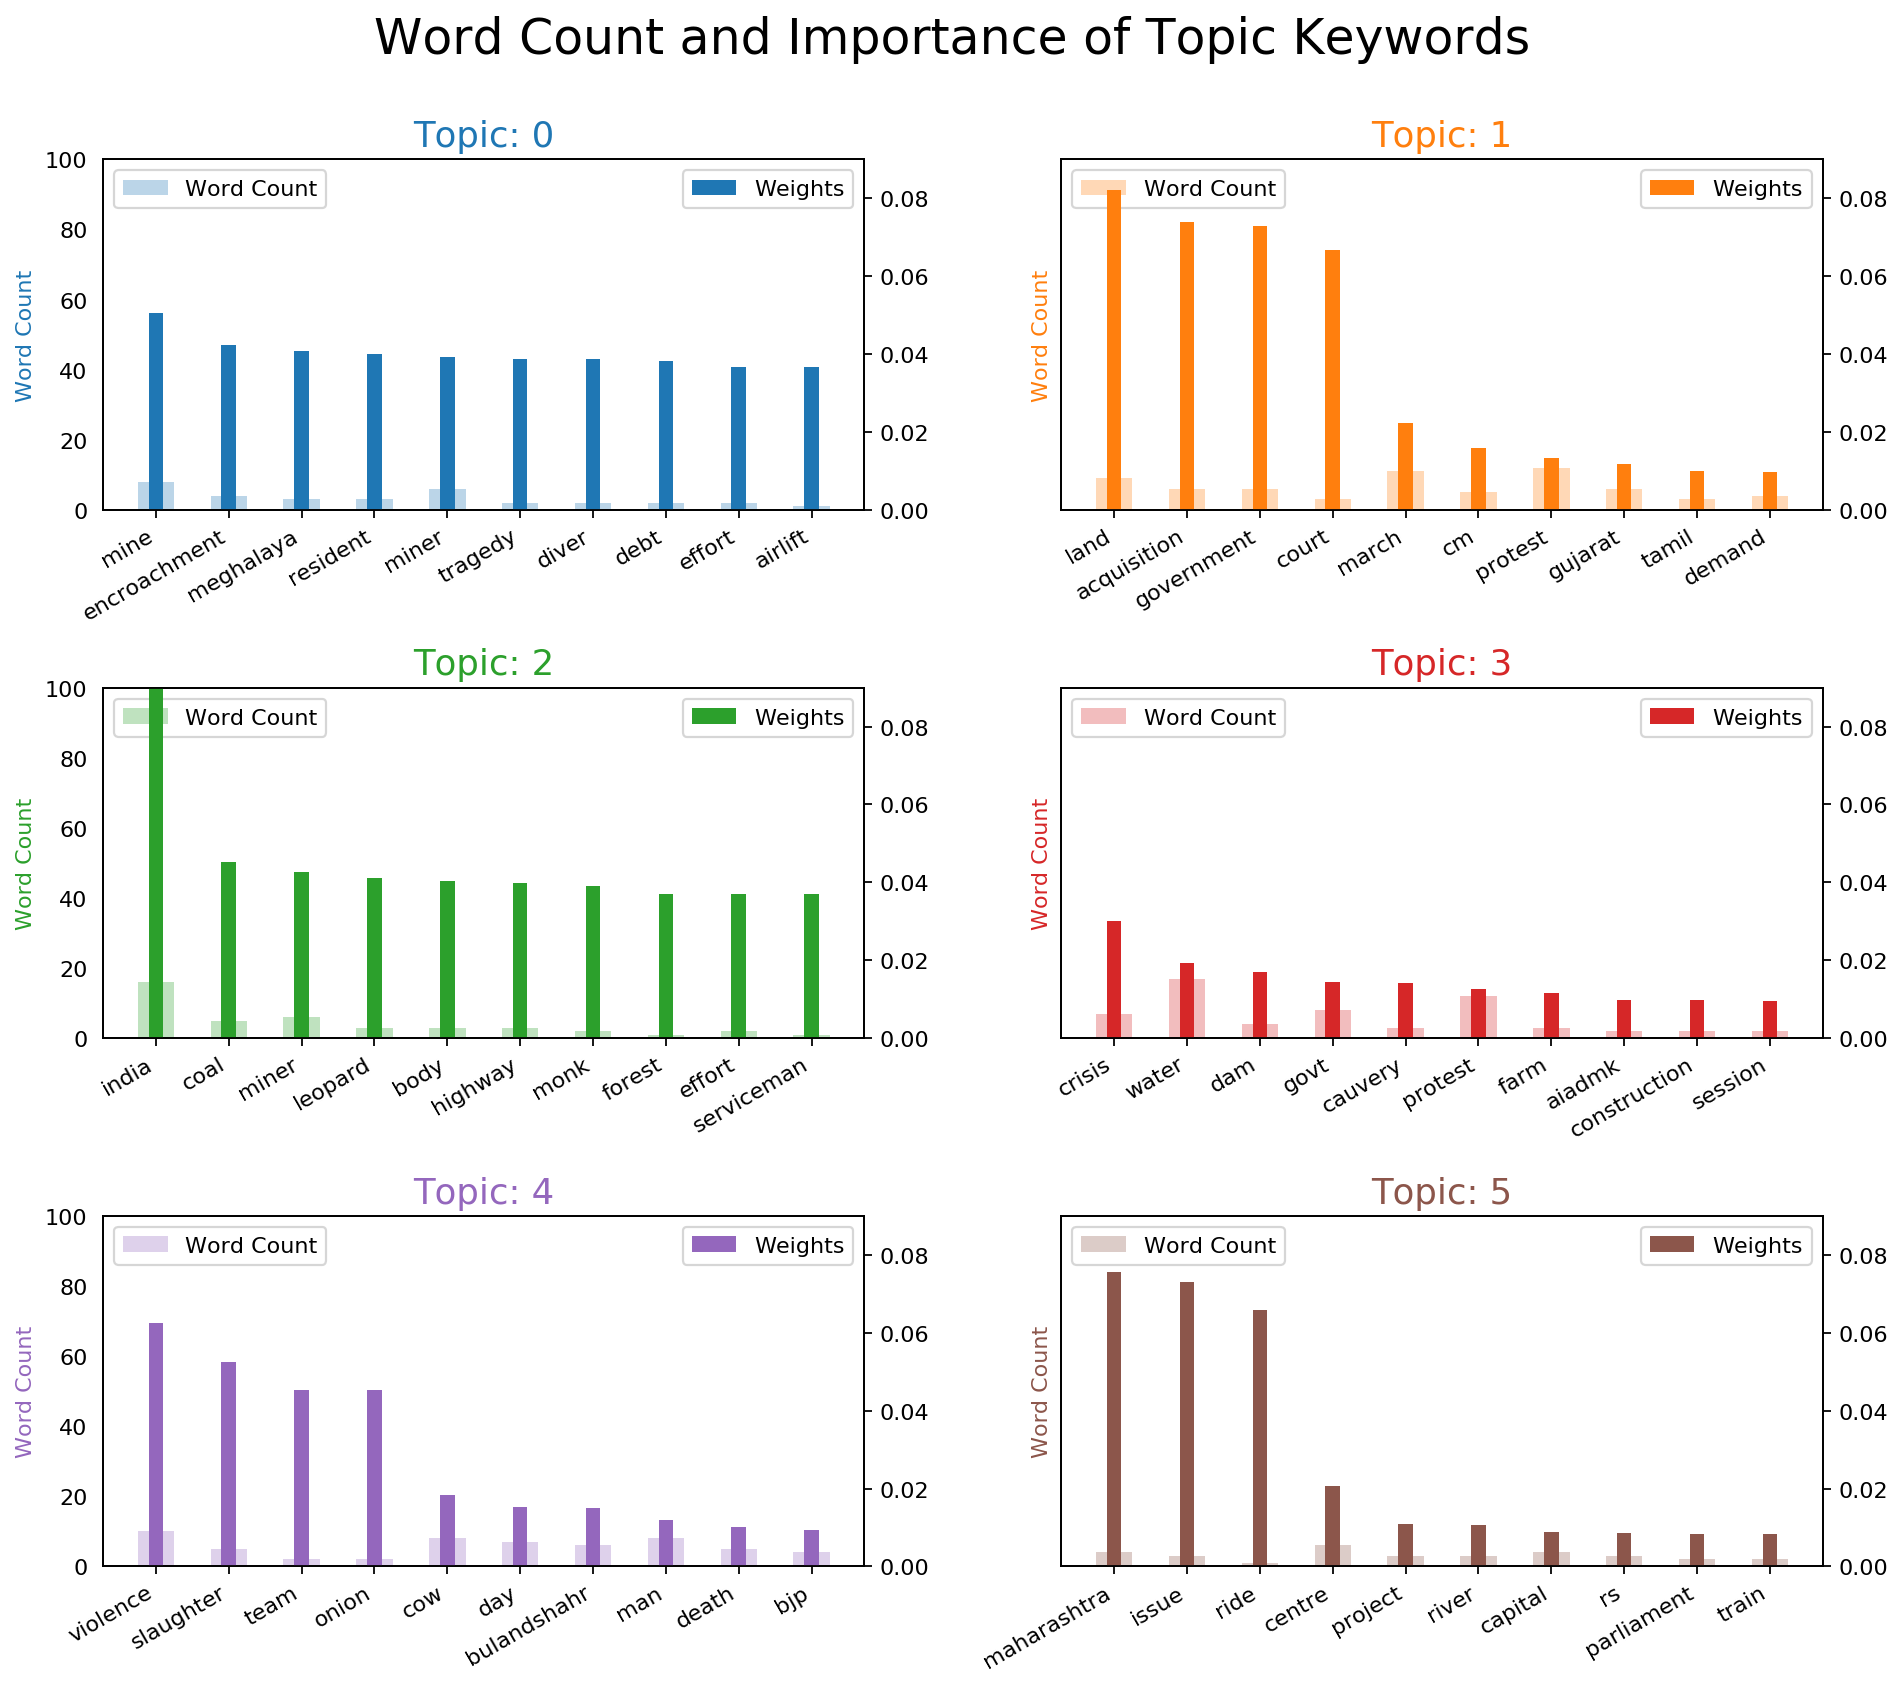

In [73]:
from collections import Counter
topics = lda_dict['all_models'][topic_to_show].show_topics(formatted=False)
data_flat = [w for w_list in doc_list for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(12,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.090); ax.set_ylim(0, 100)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Sentence Chart Colored by Topic

In [74]:
# Each word in the document is representative of one of the n topics. Let’s color 
# each word in the given documents by the topic id it is attributed to.
# The color of the enclosing rectangle is the topic assigned to the document.

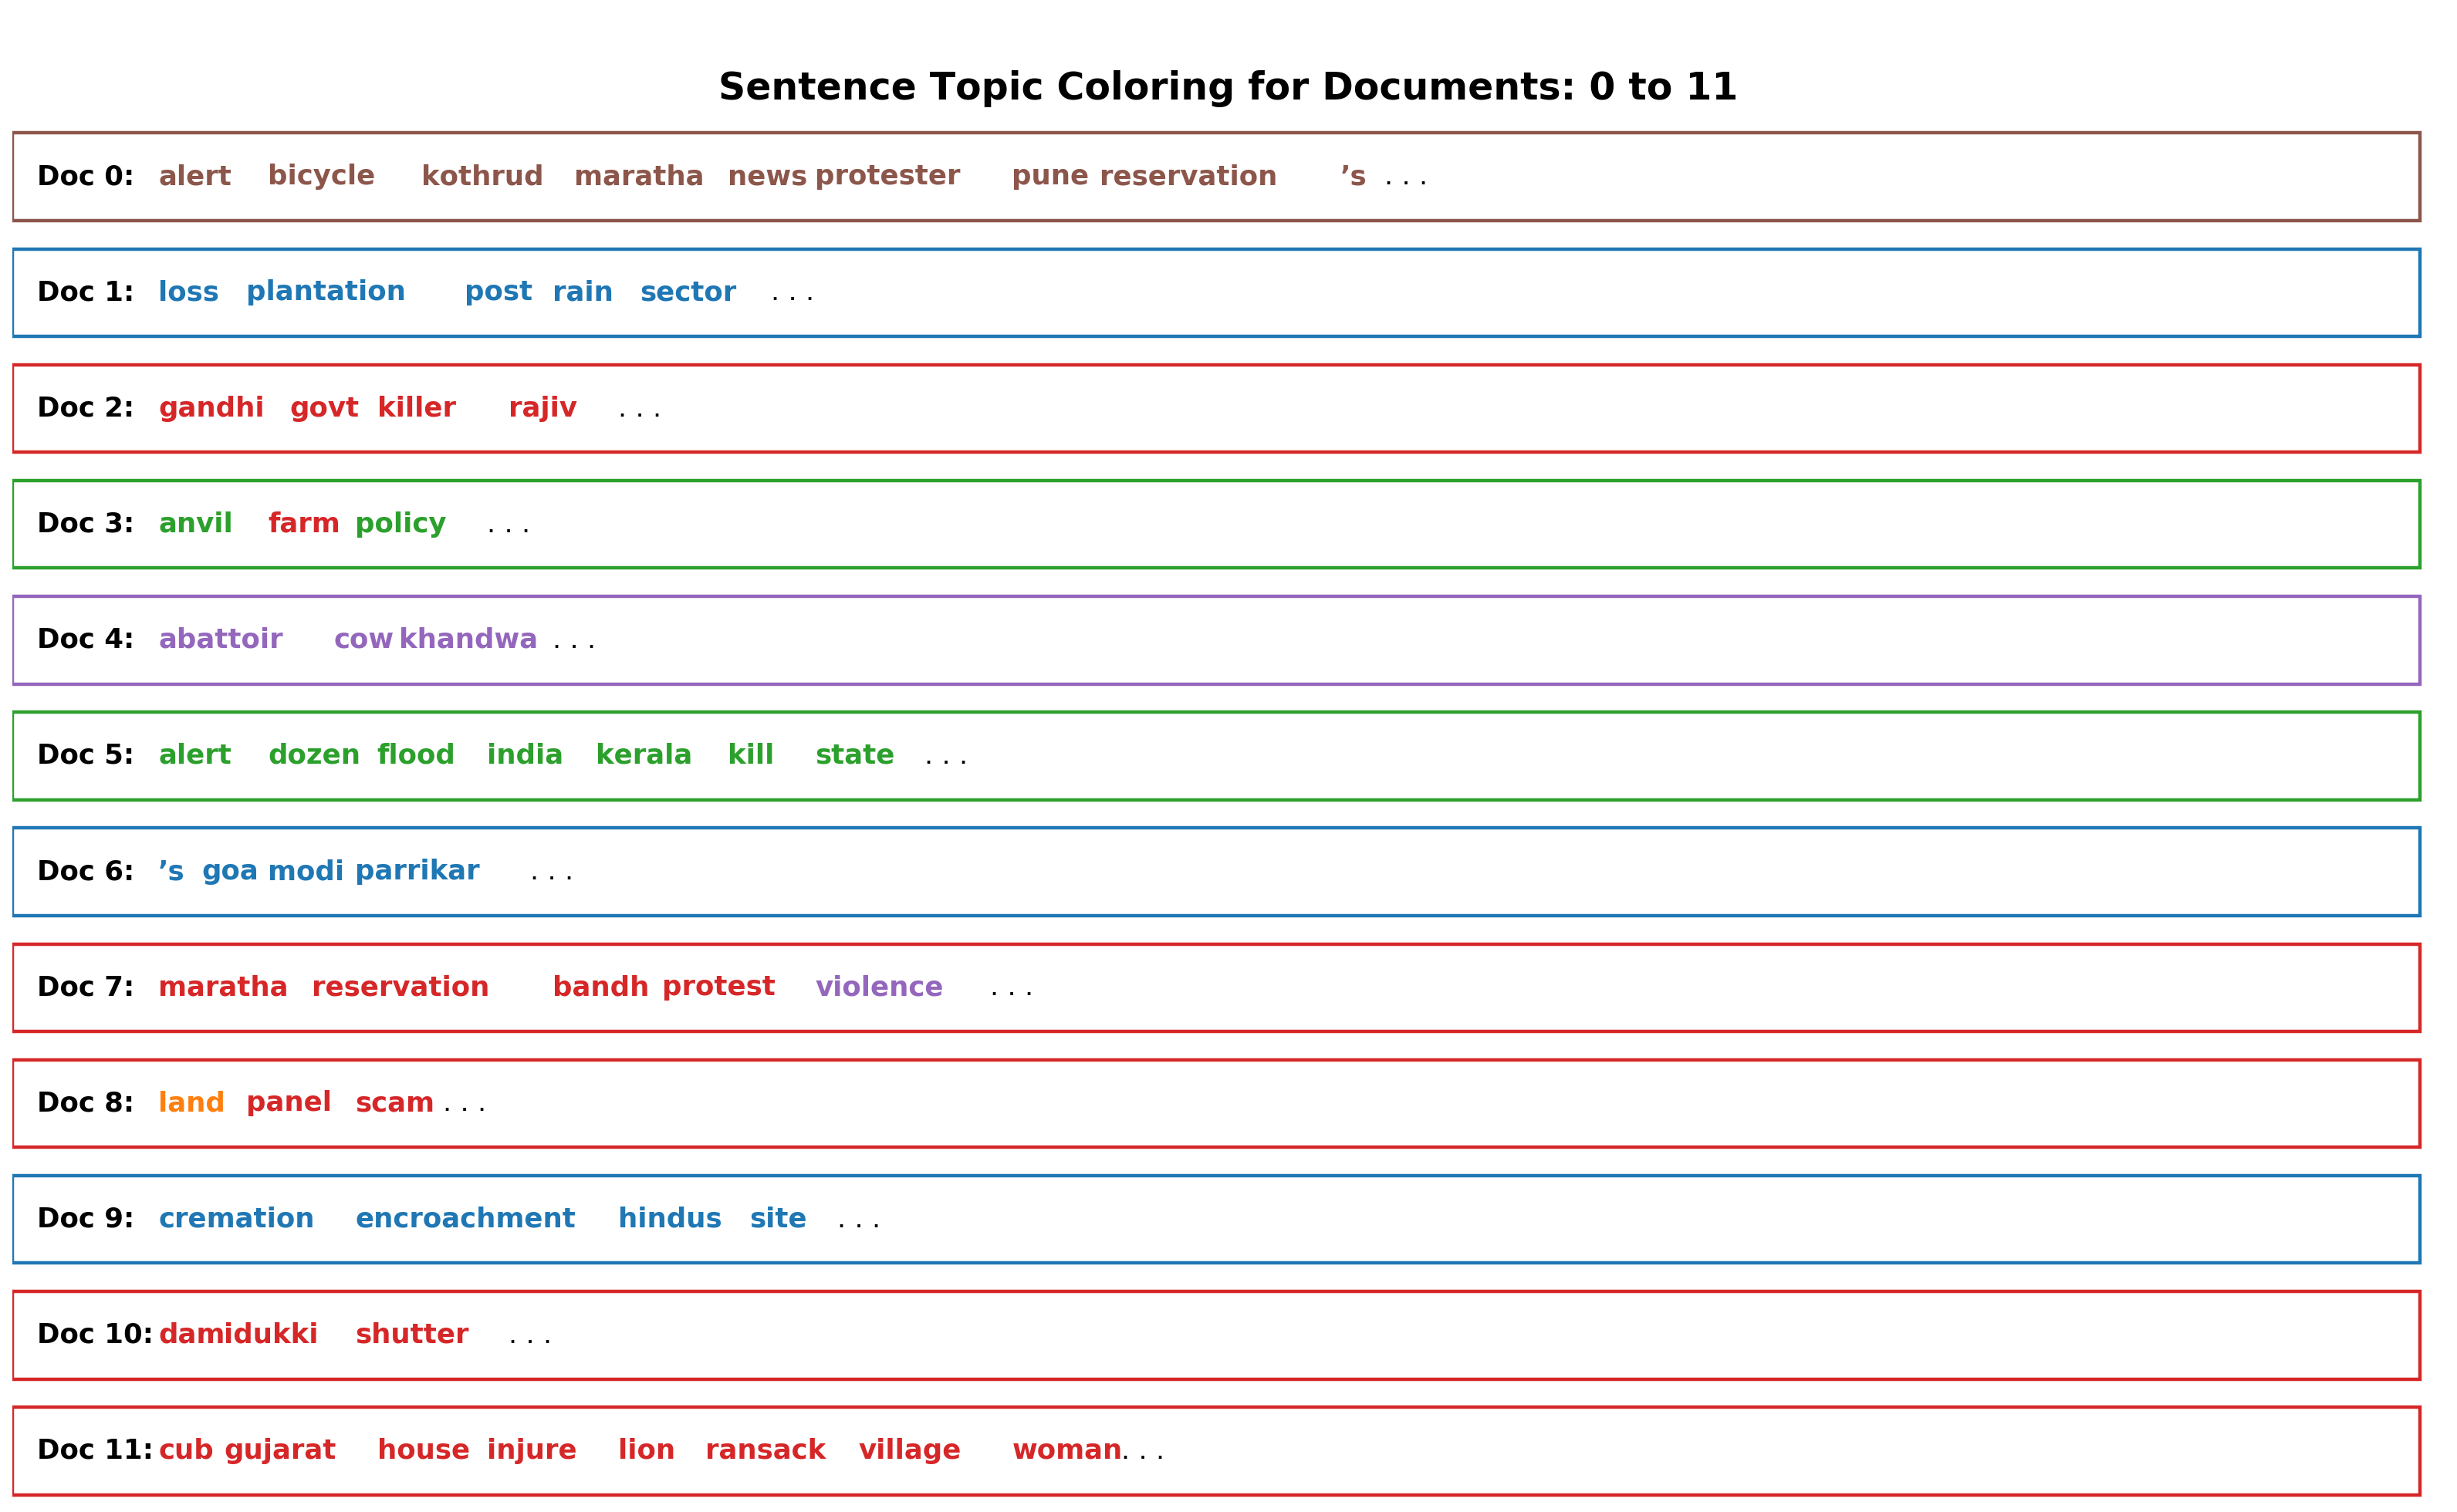

In [76]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_dict['all_models'][topic_to_show], corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

### What are the most discussed topics in the documents

In [77]:
# Let’s compute the total number of documents attributed to each topic

ValueError: too many values to unpack (expected 2)

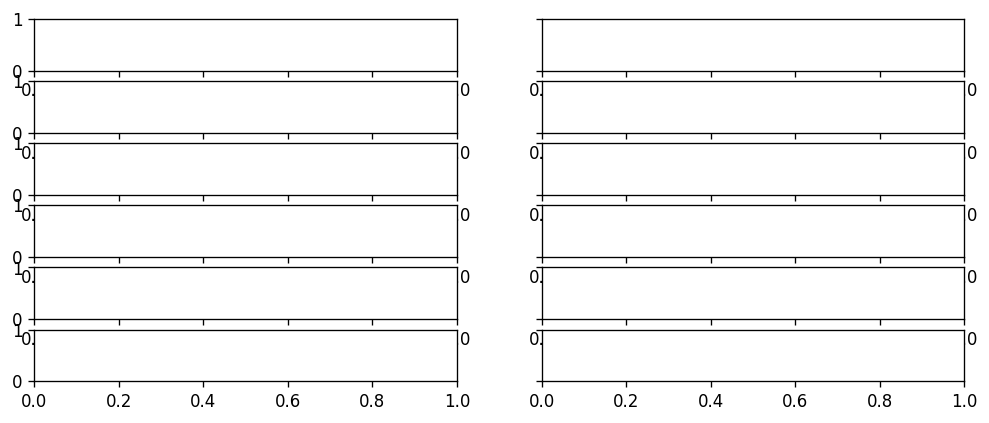

In [35]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_dict['all_models'][topic_to_show], corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_dict['all_models'][topic_to_show].show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

# Let’s make two plots:

# The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
# The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(6, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 100)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

### t-SNE Clustering Chart

In [82]:
# Let’s visualize the clusters of documents in a 2D space 
# using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [93]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_dict['all_models'][topic_to_show][corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6197 samples in 0.012s...
[t-SNE] Computed neighbors for 6197 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6197
[t-SNE] Computed conditional probabilities for sample 2000 / 6197
[t-SNE] Computed conditional probabilities for sample 3000 / 6197
[t-SNE] Computed conditional probabilities for sample 4000 / 6197
[t-SNE] Computed conditional probabilities for sample 5000 / 6197
[t-SNE] Computed conditional probabilities for sample 6000 / 6197
[t-SNE] Computed conditional probabilities for sample 6197 / 6197
[t-SNE] Mean sigma: 0.001803
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.021454
[t-SNE] KL divergence after 1000 iterations: 0.691139


Loading BokehJS ...

In [112]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_dict['all_models'][topic_to_show][corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)
print(topic_num)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = topic_to_show
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[2 0 0 ... 4 4 7]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3045 samples in 0.001s...
[t-SNE] Computed neighbors for 3045 samples in 0.203s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3045
[t-SNE] Computed conditional probabilities for sample 2000 / 3045
[t-SNE] Computed conditional probabilities for sample 3000 / 3045
[t-SNE] Computed conditional probabilities for sample 3045 / 3045
[t-SNE] Mean sigma: 0.092949
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.906837
[t-SNE] KL divergence after 1000 iterations: 0.898656


Loading BokehJS ...

IndexError: index 11 is out of bounds for axis 0 with size 10